# Jupyter Assignment 1, Thermo I Refresher & Introduction to Cantera

Mech 330, Fall 2025

Group #:
Student ID numbers:
Names: 

The main goal of this project is to use Cantera to build a water vapor dome, like those shown in the Textbook (e.g., Figure A-7). We'll use similar code in the next assignment to visualize vapor power plant cycles.

This assignment will serve as a refresher on Thermo I concepts and will introduce you to cantera, which is a powerful software package for performing thermodynamic and chemical kinetic calculations. This assignment will be somewhat shorter than subsequent Jupyter Assignments.

Assignment questions have <font color='blue'>blue text</font> and empty code boxes beneath them.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import cantera as ct

As always, the first step is to import relevant libraries, in this case, the numpy, matplotlib, and cantera libraries. If you get an error for cantera, open a Terminal window and type in:

`pip install cantera`

and try to run the cell again.

### Problem 1: Using Cantera to calculate state properties

First we will demonstrate how using Cantera can replace the steam tables used in Thermo I (we will still use steam tables in MECH 330, however, for traditional assignments and exams).

In [29]:
w = ct.Water()
w.TP = 300,101325  # K, Pa

The first line imports a 'water' object from Cantera's database.\
The last line sets the temperature and pressure of the water, in this case to standard conditions (room temperature and pressure). \
Note that Cantera uses the following standard units: \
Temperature: K \
Pressure: Pa \
Mass: kg \
Molarity: kmol (not mol)

In [30]:
w.entropy_mass  # J/kg/K

3913.1760189801585

We can now query the object's relevant state properties, just like looking up the values on the steam tables. In this case, we queried the specific entropy per unit mass, outputted in units of J/kg/K.

A list of relevant properties is below for reference.

`T` temperature (K) \
    `P` pressure (Pa) \
    `density` density = 1/specific volume (kg/m^3) \
    `Q` vapor fraction or quality (unitless) \
    `enthalpy_mass` specific enthalpy (J/kg) \
    `int_energy_mass` specific internal energy (J/kg) \
    `entropy_mass` specific entropy (J/kg/K) \
    `cp_mass` specific heat capacity at constant pressure (J/kg/K) \
    `cv_mass` specific heat capacity at constant volume (J/kg/K)


In [31]:
w()


  water:

       temperature   300 K
          pressure   1.0132e+05 Pa
           density   996.63 kg/m^3
  mean mol. weight   18.016 kg/kmol
    vapor fraction   0
   phase of matter   liquid

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy       -1.5858e+07        -2.857e+08  J
   internal energy       -1.5858e+07        -2.857e+08  J
           entropy            3913.2             70500  J/K
    Gibbs function       -1.7032e+07       -3.0685e+08  J
 heat capacity c_p            4180.8             75321  J/K
 heat capacity c_v              4131             74424  J/K



We can also take a look at the state of the water and relevant properties by calling `w()`, where `w` is the name of the object.

<font color='blue'>1.1: In the cell below, query the specific enthalpy (units are J/kg). It should match what is listed above. (0.5 points)

In [32]:
print(w.enthalpy_mass)


-15858111.055961624


<font color='blue'>1.2: Now change the object's temperature and pressure to 200C (note you will need to convert from C to K) and 1 atm (again, you will need to convert from atm to Pa), and query the entropy per unit mass. (0.5 points)</font>

Note that this corresponds to superheated vapor (remember of course, the boiling point of water is 100C at 1 atm)

Hint, use the same `TP` command as above.

In [33]:
w.TP = 473.15,101325 

You can also query the saturation temperature at the current pressure using `T_sat` or the saturation pressure at the current temperature using `P_sat`

<font color='blue'>1.3 Query the saturation temperature at the current pressure (1 atm) and verify that it is approximately 100C. (0.5 points)

In [34]:
# YOUR CODE HERE
print(f"{w.T_sat} Kelvin")
print(f"{w.T_sat-273.15} Celcius")

373.1772329454416 Kelvin
100.0272329454416 Celcius


It's also possible to prescribe the thermodynamic state of the water object using other inputs besides temperature and pressure. Note that when setting properties, the syntax is always capitalized. For example, when setting entropy and pressure, the syntax is `w.SP`. A full list of these are listed here: https://cantera.org/documentation/docs-2.6/sphinx/html/cython/importing.html#pure-fluid-phases

But the relevant ones for this class are: \
        `TP` temperature and pressure \
    `SP` entropy and pressure \
    `HP` enthalpy and pressure \
    `TH` temperature and enthalpy \
    `TQ` temperature and quality \
    `PQ` pressure and quality \
    `TD` temperature and density \
    `SV` entropy and specific volume
 \
If you're trying one not listed here and get an error, try switching the order of the letters.

<font color='blue'>1.4: Now change the object's temperature to 100C and its quality to 0 (saturated liquid). Query the saturation pressure. Verify it is around 1 atm. (0.5 points) </font>

In [35]:
# YOUR CODE HERE
w.TQ = 373.15, 0.5  # K, quality
print(f"{w.P/101325} atm")

0.999028425467129 atm


### Problem 2: Building a vapor dome
We are now ready to build the vapor dome using Cantera. Our goal is to plot the vapor dome on a T-s diagram.

We will calculate the left and right side of the vapor dome separately. Remember, the left side of the vapor dome corresponds to saturated liquid, the right side of the vapor dome corresponds to saturated vapor, and the top of the vapor dome is the critical point.

Some starter code has made a numpy vector of temperatures between 274K and 647.28K (near the critical point, which can be queried with `w.critical_temperature`), and initialized entropy vectors for the left and right sides of the vapor dome.

<font color='blue'>2.1: Using a `for` loop, calculate the specific entropy for a saturated liquid (`s_left`) and saturated vapor (`s_right`) for each point in the temperature vector. (1 point) </font>

Hint, you will use the same command used in part 1.4.

In [36]:
T_vapordome = np.linspace(274,647.28,200)
s_left = np.zeros(len(T_vapordome))
s_right = np.zeros(len(T_vapordome))

# YOUR CODE HERE

for i, T in enumerate(T_vapordome):
    w.TQ = T, 0
    s_left[i] = w.entropy_mass

    w.TQ = T, 1
    s_right[i] = w.entropy_mass


In [37]:
# Autograde test cell

<font color='blue'>2.2 Now plot the results using matplotlib, making sure to label your axes. (1 point)</font>

Hint: In a T-s diagram, entropy is on the x-axis, temperature on the y-axis.

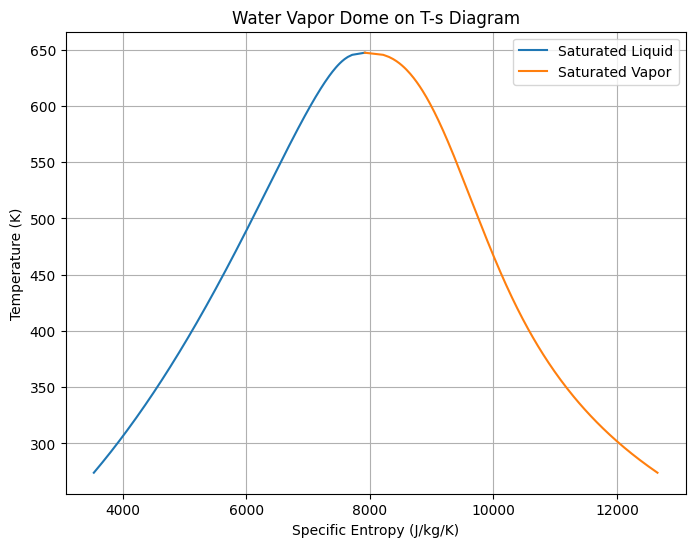

In [38]:
# YOUR CODE HERE
plt.figure(figsize=(8,6))
plt.plot(s_left, T_vapordome, label='Saturated Liquid')
plt.plot(s_right, T_vapordome, label='Saturated Vapor')
plt.xlabel('Specific Entropy (J/kg/K)')
plt.ylabel('Temperature (K)')
plt.title('Water Vapor Dome on T-s Diagram')
plt.legend()
plt.grid(True)
plt.show()

Finally, let's add some isobars to the T-s diagram.

<font color='blue'>2.3 Pick 3 values of pressure that go through the vapor dome and 1 that exceeds the vapor dome (you can play around to find appropriate values of pressure, or calculate the critical pressure using `w.critical_pressure`). For the supplied entropy vector (`S_isobar`), calculate the temperatures corresponding to the chosen pressure.</font>

Hint: Use `w.SP` to set the state. Remember that a pressure and entropy fully defines a state, even within the vapor dome.

Second hint: You may encounter errors if you try pressures higher than 300 bar (this is a good maximum).

In [39]:
print(w.critical_pressure/100000)

220.89


In [42]:
S_isobar = np.linspace(4000,11000,200)
P_isobar = np.array([50,100,150,250]) * 1e5  # Fill in 4 unique values here, note I have it converting from bar to Pa
T_isobar = np.zeros((len(S_isobar),len(P_isobar)))

for i in range (len(P_isobar)):
    for j in range(len(S_isobar)):
        w.SP = S_isobar[j], P_isobar[i]
        T_isobar[j, i] = w.T


<font color='blue'>2.4 Now add the isobars to your vapordome plot (starting by copying the plotting code from 2.2). Be sure to label the isobars or add a legend. (2 points)</font>

Text(0, 0.5, 'Temperature(K)')

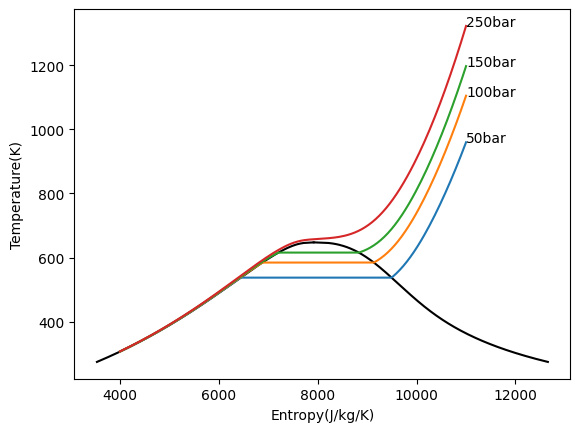

In [43]:
# YOUR CODE HERE
plt.plot(s_left, T_vapordome, 'k-')
plt.plot(s_right, T_vapordome, 'k-')
for i in range(len(P_isobar)):
    plt.plot(S_isobar, T_isobar[:, i])
    plt.text(S_isobar[-1], T_isobar[-1, i], str(int(P_isobar[i]/1e5))+'bar')
plt.xlabel('Entropy(J/kg/K)')
plt.ylabel('Temperature(K)')